### Project Name : Telecom Customer Churn Prediction

### Group Members:
    --> Srushti Lohiya (1132210115) Roll No:21
    --> Subodh Hande (1132210551) Roll No:63
    --> Akash Vanarse (1132210292) Roll No:35
    --> Urvashi Kumari (1132210167) Roll No:23

The data set includes information about:
- Customers who left within the last month – Column Name: Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

In [1]:
#importing necessary libraries accordingly
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the data file
df=pd.read_csv("CustomerChurnData.csv")
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [3]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
df = df.drop(columns = ["customerID"])

In [5]:
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [6]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
#checking the data types of all the columns
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

- SeniorCitizen is actually a categorical hence the 25% - 50% - 75% distribution is not proper.
- 75% customer have tenure less than 55 months.
- Average Monthly charges are USD 64.76 whereas 25% customers pay more than the USD 89.85 per month.

<AxesSubplot:ylabel='Churn'>

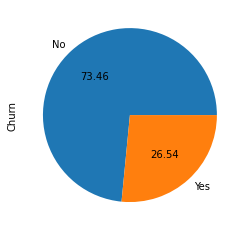

In [9]:
df['Churn'].value_counts().plot(kind='pie',autopct='%.2f')

### Data is highly imbalanced, ratio - 73:27

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Data cleaning:

In [11]:
df["TotalCharges"]

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [12]:
tel_data = df.copy()

In [13]:
tel_data.TotalCharges = pd.to_numeric(tel_data.TotalCharges, errors='coerce')
tel_data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### There are 11 missing values in TotalCharges column

In [14]:
tel_data.loc[tel_data['TotalCharges'].isnull()==True]

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)           52.55           NaN    No  
753                Mailed check           20.25           NaN    No  
936                Mailed check           80.85           NaN    No  
1082               Mailed check           25.75           NaN    No  
1340    Credit card (automatic)           56.05           NaN    No  
3331               Mailed check           19.85           NaN    No  
3826               Mailed check           25.35           NaN    No  
4380               Mailed check           20.00           

### The % of missing records compared to total dataset is very low i.e. 0.15%

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

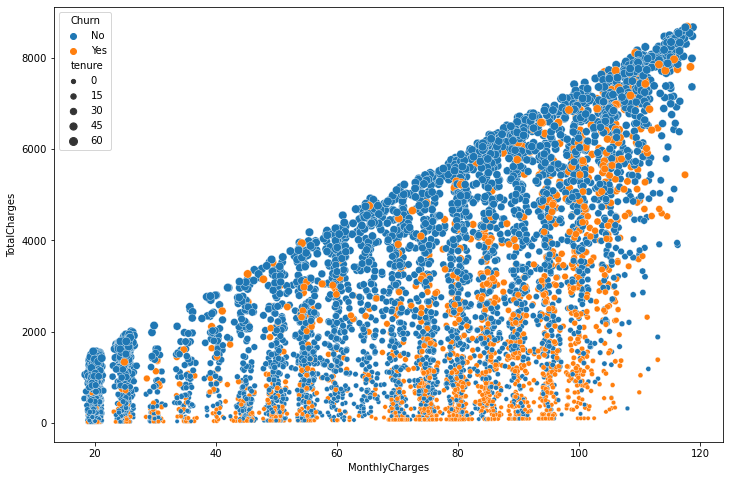

In [16]:
plt.figure(figsize=(12,8))
sns.scatterplot('MonthlyCharges','TotalCharges',hue='Churn',size='tenure',data=tel_data)

In [17]:
#removing missing values
tel_data.dropna(how='any',inplace=True)

<AxesSubplot:>

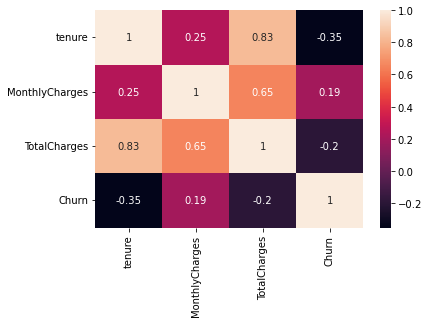

In [18]:
# Correlation check:
data=tel_data[['tenure','MonthlyCharges','TotalCharges','Churn']]
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Churn']=le.fit_transform(data['Churn'])
sns.heatmap(data.corr(),annot=True)

### Data Visualization :

### Univariate Analysis

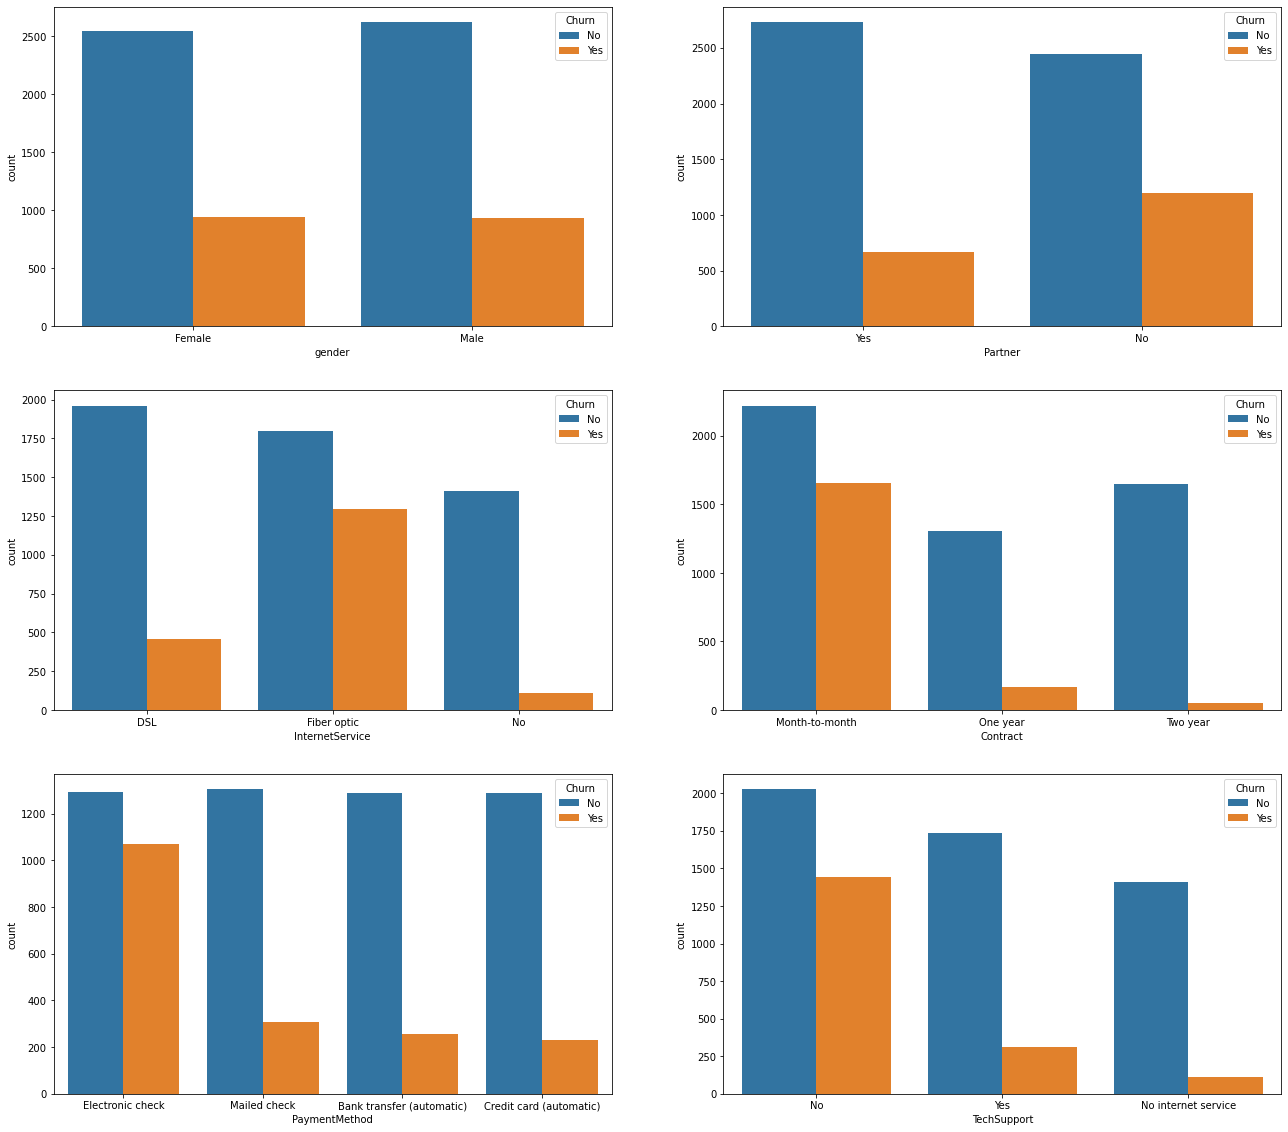

In [19]:
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(22,20))
df_cat=df[['gender','Partner','InternetService','Contract','PaymentMethod','TechSupport']]
for feature,subplot in zip(df_cat.columns,ax.flatten()):
  sns.countplot(df_cat[feature],ax=subplot,hue=df['Churn'])

- The count of male and female is approx same for churn customer and we can say customer churn is not affected by gender.
- There are more churn customer in single relationship category as comapre to married.
- The customer who have Fiberopic internet service are more likely to churn.
- The customer with no internet service have a very low churn rate.
- The customer who take contract month on month are more likely to be churn.
- The customer who pay the bill through electronic check are more likely to churn.

([<matplotlib.patches.Wedge at 0x19f0d28cf70>,
 [Text(-0.9603414027015803, 0.5364181114179138, 'Non-Senior'),
  Text(0.9603414278131233, -0.5364180664610878, 'Senior')],
 [Text(-0.523822583291771, 0.29259169713704386, '83.79%'),
  Text(0.5238225969889763, -0.29259167261513874, '16.21%')])

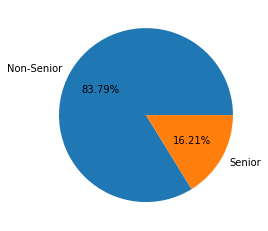

In [20]:
plt.pie((df['SeniorCitizen'].value_counts(normalize=True)*100).values,labels=['Non-Senior','Senior'],autopct='%1.2f%%')

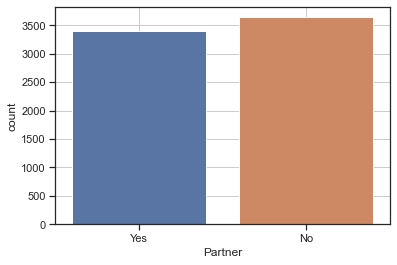

In [21]:
sns.set(style="ticks")
sns.countplot(df['Partner'])
plt.grid()

In [22]:
df['Partner'].value_counts(normalize=True)*100

No     51.69672
Yes    48.30328
Name: Partner, dtype: float64

<AxesSubplot:xlabel='tenure', ylabel='Density'>

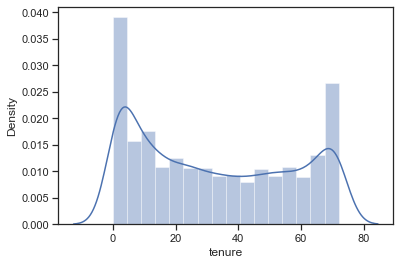

In [23]:
sns.distplot(df['tenure'])

([<matplotlib.patches.Wedge at 0x19f0d17a700>,
 [Text(-1.0494915966975706, 0.3294956577273573, 'Phone Service Used'),
  Text(1.049491627547176, -0.32949555946686127, 'Not used')],
 [Text(-0.5724499618350385, 0.17972490421492215, '90.32%'),
  Text(0.5724499786620959, -0.17972485061828794, '9.68%')])

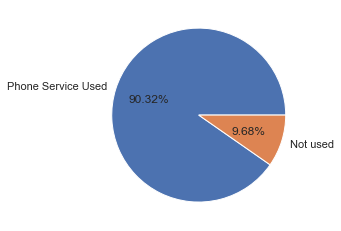

In [24]:
plt.pie(df['PhoneService'].value_counts().values,labels=['Phone Service Used','Not used'],autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x19f0d1c2e80>,
 [Text(0.5426181731482101, 0.956851878907754, 'Electronic check'),
  Text(-1.0466614167922357, 0.33837830692653775, 'Mailed check'),
  Text(-0.5037781622923265, -0.9778586621784185, 'Bank transfer (automatic)'),
  Text(0.8560892632593112, -0.690732345653604, 'Credit card (automatic)')],
 [Text(0.2959735489899328, 0.5219192066769567, '33.58%'),
  Text(-0.5709062273412193, 0.18456998559629328, '22.89%'),
  Text(-0.27478808852308717, -0.5333774520973191, '21.92%'),
  Text(0.46695777995962423, -0.3767630976292385, '21.61%')])

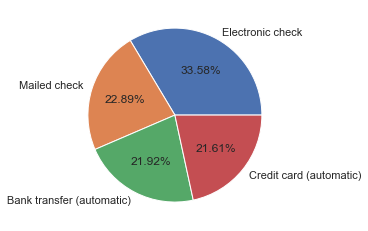

In [25]:
plt.pie(df['PaymentMethod'].value_counts().values,labels=df['PaymentMethod'].value_counts().index,autopct='%1.2f%%')

In [26]:
#converting the target variable 'Churn' in a binary numeric variable i.e. Yes=1, No=0
tel_data['Churn']=np.where(tel_data.Churn=='Yes',1,0)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

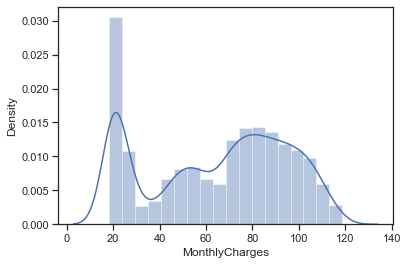

In [27]:
sns.distplot(df['MonthlyCharges'])

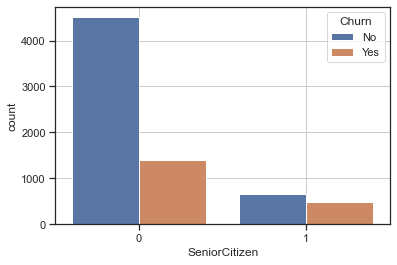

In [28]:
sns.countplot('SeniorCitizen',hue='Churn',data=df)
plt.grid()

In [29]:
df.groupby('SeniorCitizen')['Churn'].value_counts()

SeniorCitizen  Churn
0              No       4508
               Yes      1393
1              No        666
               Yes       476
Name: Churn, dtype: int64

### Churn ratio : 23% non-seniors have churned out and 41.6% seniors have churned out

<AxesSubplot:xlabel='Partner', ylabel='count'>

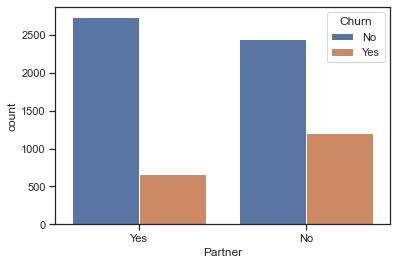

In [30]:
sns.countplot('Partner',hue='Churn',data=df)

In [31]:
df.groupby('Partner')['Churn'].value_counts()

Partner  Churn
No       No       2441
         Yes      1200
Yes      No       2733
         Yes       669
Name: Churn, dtype: int64

### Single customers, who were not partners have churned out more as compared to partners one.

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

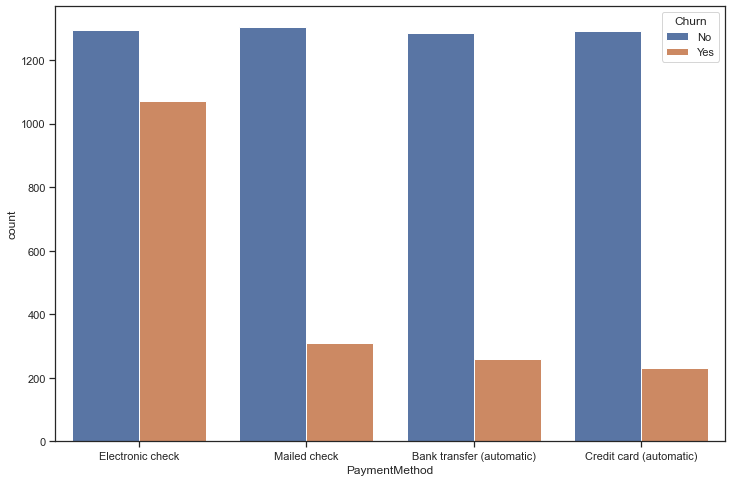

In [32]:
plt.figure(figsize=(12,8))
sns.countplot('PaymentMethod',hue='Churn',data=df)

In [33]:
tel_data.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

   Churn  
0      0  
1      0  
2      1  
3      0  
4      1

In [34]:
#converting all the categorical values into dummy variables
data_dummies=pd.get_dummies(tel_data)
data_dummies.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Female  \
0              0       1           29.85         29.85      0              1   
1              0      34           56.95       1889.50      0              0   
2              0       2           53.85        108.15      1              0   
3              0      45           42.30       1840.75      0              0   
4              0       2           70.70        151.65      1              1   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  ...  \
0            0           0            1              1  ...   
1            1           1            0              1  ...   
2            1           1            0              1  ...   
3            1           1            0              1  ...   
4            0           1            0              1  ...   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                    0                        1                  0   
1                    0                        0                  1   
2                    0                        1                  0   
3                    0                        0                  1   
4                    0                        1                  0   

   Contract_Two year  PaperlessBilling_No  PaperlessBilling_Yes  \
0                  0                    0                     1   
1                  0                    1                     0   
2                  0                    0                     1   
3                  0                    1                     0   
4                  0                    0                     1   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 46 columns]

In [35]:
fig = px.histogram(tel_data, x="Churn", color="Contract", barmode="group", title="Customer contract distribution")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

### About 75% of customer with Month-to-Month Contract opted to move out as compared to 13% of customrs with One Year Contract and 3% with Two Year Contract

In [36]:
fig = px.histogram(tel_data, x="Churn", color="PaymentMethod", title="Customer Payment Method distribution w.r.t. Churn")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

- Major customers who moved out were having Electronic Check as Payment Method.
- Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.

In [37]:
tel_data['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [38]:
tel_data[tel_data["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              0        992
Fiber optic      0        910
No               0        717
Fiber optic      1        633
DSL              1        240
No               1         57
dtype: int64

In [39]:
tel_data[tel_data["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              0        965
Fiber optic      0        889
No               0        690
Fiber optic      1        664
DSL              1        219
No               1         56
dtype: int64

In [40]:
fig = go.Figure()
fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="Churn Distribution w.r.t. Internet Service and Gender")
fig.show()

- A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high    churn rate, this might suggest a dissatisfaction with this type of internet service.
- Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.

Text(0.5, 1.0, 'Monthly charges by churn')

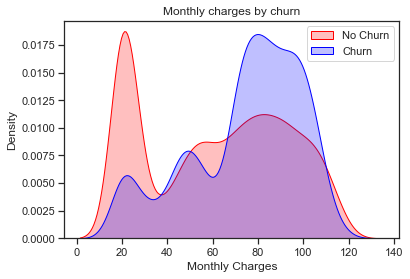

In [41]:
#Churn by MonthlyCharges and TotalCharges
Mth = sns.kdeplot(data_dummies.MonthlyCharges[(data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(data_dummies.MonthlyCharges[(data_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

### Customers with higher monthly charges are more likely to churn

Text(0.5, 1.0, 'Total charges by churn')

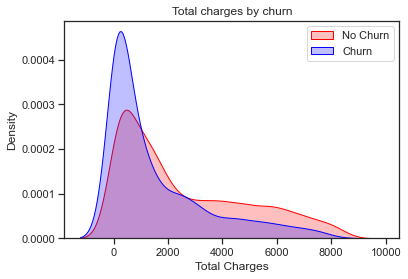

In [42]:
Tot = sns.kdeplot(data_dummies.TotalCharges[(data_dummies["Churn"] == 0)],
                color="Red", shade = True)
Tot = sns.kdeplot(data_dummies.TotalCharges[(data_dummies["Churn"] == 1)],
                ax=Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

### Higher churn at lower TotalCharges, Higher Monthly Charge at lower tenure results into lower TotalCharge. Therefore, Higher Monthly Charge, Lower Tenure and Lower Total Charge are linked to High Churn.

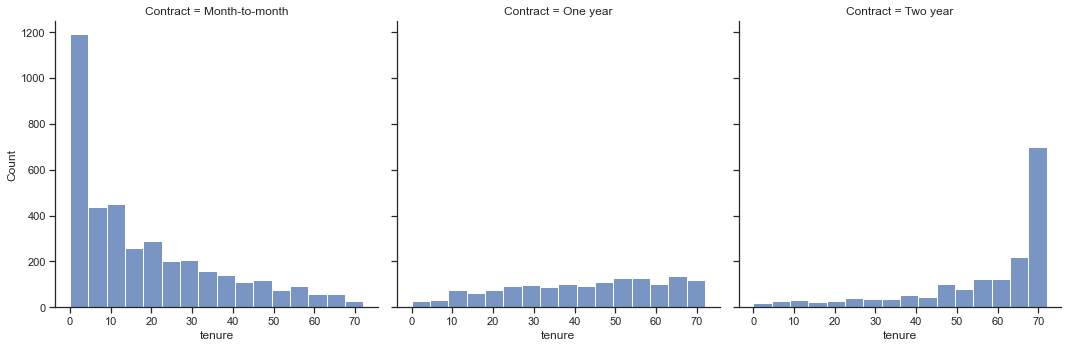

In [43]:
sns.displot(data=df,x='tenure',col='Contract')

### We can see that from above plot that the customer who took contract of 2 year most of them last for 70 months and this shows they are more loyal than the others.

<AxesSubplot:>

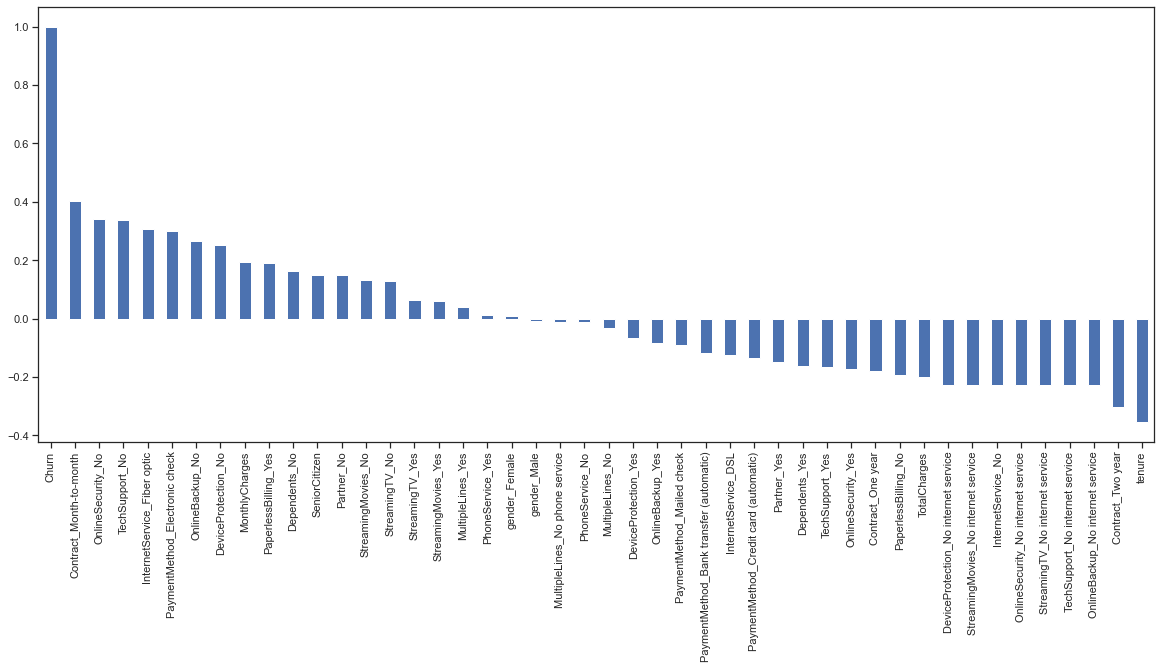

In [44]:
plt.figure(figsize=(20,8))
data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

- High Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet.
- Low Churn seen in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years.
- Factors like Gender, Availability of PhoneService and multiple lines have almost NO impact on Churn.

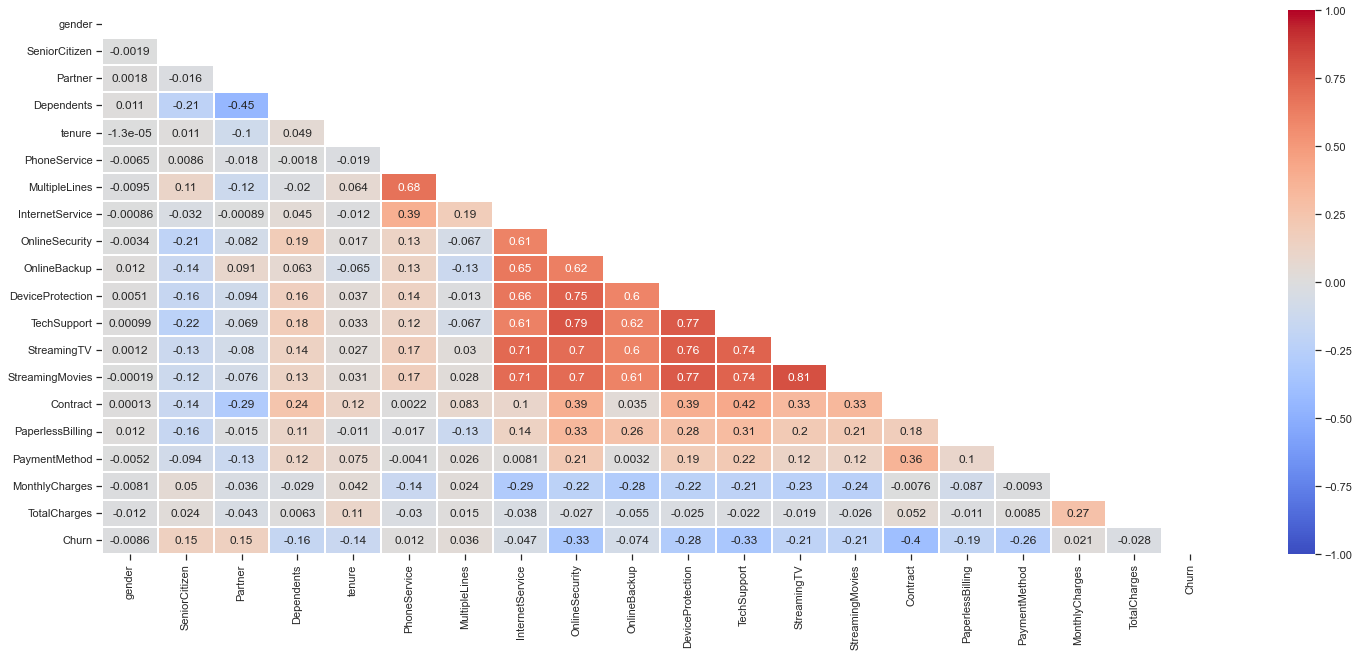

In [45]:
#Set and compute the Correlation Matrix:
plt.figure(figsize=(25, 10))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

### Outliers

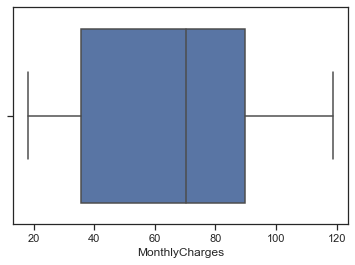

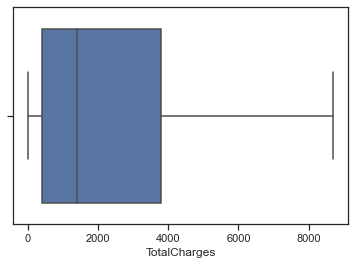

In [46]:
for i in tel_data.columns:
    if tel_data[i].dtypes==np.number:
        sns.boxplot(tel_data[i])
        plt.show()

### Transformation :

In [47]:
tel_data.skew()

SeniorCitizen     1.831103
tenure            0.237731
MonthlyCharges   -0.222103
TotalCharges      0.961642
Churn             1.060622
dtype: float64

In [48]:
tel_data['tenure']=tel_data['tenure'].astype(float)

In [49]:
tel_data['tenure'].dtypes

dtype('float64')

In [50]:
num=tel_data[['tenure','MonthlyCharges','TotalCharges']]
num

tenure  MonthlyCharges  TotalCharges
0        1.0           29.85         29.85
1       34.0           56.95       1889.50
2        2.0           53.85        108.15
3       45.0           42.30       1840.75
4        2.0           70.70        151.65
...      ...             ...           ...
7038    24.0           84.80       1990.50
7039    72.0          103.20       7362.90
7040    11.0           29.60        346.45
7041     4.0           74.40        306.60
7042    66.0          105.65       6844.50

[7032 rows x 3 columns]

In [51]:
from sklearn.preprocessing import power_transform
trans=power_transform(num)
trans

array([[-1.64951069, -1.15999612, -1.81006854],
       [ 0.29446662, -0.24134546,  0.25425652],
       [-1.50065727, -0.34453193, -1.38609098],
       ...,
       [-0.72981162, -1.16868516, -0.85839282],
       [-1.27030416,  0.33273687, -0.92147688],
       [ 1.20165864,  1.33845304,  1.48336977]])

In [52]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
num=sc.fit_transform(trans)
number=pd.DataFrame(num)
number

0         1         2
0    -1.649511 -1.159996 -1.810069
1     0.294467 -0.241345  0.254257
2    -1.500657 -0.344532 -1.386091
3     0.644481 -0.732875  0.233220
4    -1.500657  0.211884 -1.248808
...        ...       ...       ...
7027 -0.081666  0.670240  0.296583
7028  1.342400  1.260454  1.565846
7029 -0.729812 -1.168685 -0.858393
7030 -1.270304  0.332737 -0.921477
7031  1.201659  1.338453  1.483370

[7032 rows x 3 columns]

In [53]:
cat=tel_data[['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']]

In [54]:
category=pd.get_dummies(cat,drop_first=True)
category

SeniorCitizen  gender_Male  Partner_Yes  Dependents_Yes  \
0                 0            0            1               0   
1                 0            1            0               0   
2                 0            1            0               0   
3                 0            1            0               0   
4                 0            0            0               0   
...             ...          ...          ...             ...   
7038              0            1            1               1   
7039              0            0            1               1   
7040              0            0            1               1   
7041              1            1            1               0   
7042              0            1            0               0   

      PhoneService_Yes  MultipleLines_No phone service  MultipleLines_Yes  \
0                    0                               1                  0   
1                    1                               0                  0   
2                    1                               0                  0   
3                    0                               1                  0   
4                    1                               0                  0   
...                ...                             ...                ...   
7038                 1                               0                  1   
7039                 1                               0                  1   
7040                 0                               1                  0   
7041                 1                               0                  1   
7042                 1                               0                  0   

      InternetService_Fiber optic  InternetService_No  \
0                               0                   0   
1                               0                   0   
2                               0                   0   
3                               0                   0   
4                               1                   0   
...                           ...                 ...   
7038                            0                   0   
7039                            1                   0   
7040                            0                   0   
7041                            1                   0   
7042                            1                   0   

      OnlineSecurity_No internet service  ...  \
0                                      0  ...   
1                                      0  ...   
2                                      0  ...   
3                                      0  ...   
4                                      0  ...   
...                                  ...  ...   
7038                                   0  ...   
7039                                   0  ...   
7040                                   0  ...   
7041                                   0  ...   
7042                                   0  ...   

      StreamingTV_No internet service  StreamingTV_Yes  \
0                                   0                0   
1                                   0                0   
2                                   0                0   
3                                   0                0   
4                                   0                0   
...                               ...              ...   
7038                                0                1   
7039                                0                1   
7040                                0                0   
7041                                0                0   
7042                                0                1   

      StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                       0                    0   
1                                       0                    0   
2                                       0                    0   
3                                       0                    0   

In [55]:
number.shape , category.shape

((7032, 3), (7032, 27))

In [56]:
type(number)  , type(category)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [57]:
X=pd.concat([number,category],axis=1)

### Model Building

In [59]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

In [60]:
#splitting the data into train and test sets
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [61]:
df = df.apply(lambda x: object_to_int(x))
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85          2505      0  
1                 0              3           56.95          1466      0  
2                 1              3           53.85           157      1  
3                 0              0           42.30          1400      0  
4                 1              2           70.70           925      1

In [62]:
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
TotalCharges        0.014479
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

<Figure size 1008x504 with 0 Axes>

In [63]:
x=df.drop('Churn',axis=1)
y=df['Churn']

In [64]:
x.shape, y.shape

((7043, 19), (7043,))

In [65]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [67]:
x.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                 1              2           29.85          2505  
1                 0              3           56.95          1466  
2                 1              3           53.85           157  
3                 0              0           42.30          1400  
4                 1              2           70.70           925

### Balance the dataset
### SMOTE

In [68]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
bal_x,bal_y=sm.fit_resample(x,y)

In [69]:
bal_x.shape , bal_y.shape

((10348, 19), (10348,))

### Train Test Split

In [70]:
x_train,x_test,y_train,y_test=train_test_split(bal_x,bal_y, test_size=0.2)

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train),index=x_train.index,columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test),index=x_test.index,columns=x_test.columns)

In [72]:
display(x_train, y_train, x_test)

gender  SeniorCitizen   Partner  Dependents    tenure  PhoneService  \
6763   1.162341       2.616571  1.300782    1.932095  1.822118      0.344674   
3626   1.162341      -0.382180 -0.768769    1.932095 -0.190552      0.344674   
1521   1.162341      -0.382180 -0.768769   -0.517573  0.396477      0.344674   
8168  -0.860333      -0.382180 -0.768769   -0.517573 -1.113026      0.344674   
6361  -0.860333      -0.382180 -0.768769   -0.517573 -0.861442      0.344674   
...         ...            ...       ...         ...       ...           ...   
179    1.162341      -0.382180  1.300782   -0.517573  1.402812      0.344674   
7864  -0.860333      -0.382180 -0.768769   -0.517573 -1.113026      0.344674   
10004 -0.860333      -0.382180 -0.768769   -0.517573 -0.945303     -2.901296   
1258  -0.860333      -0.382180 -0.768769   -0.517573  0.815783      0.344674   
5352   1.162341      -0.382180 -0.768769   -0.517573 -0.064760      0.344674   

       MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
6763        1.195844        -1.228107       -0.763576      1.455521   
3626       -0.968625        -1.228107       -0.763576      1.455521   
1521        1.195844        -1.228107        1.728394      1.455521   
8168       -0.968625         1.717358        0.482409      0.284825   
6361       -0.968625        -1.228107       -0.763576     -0.885871   
...              ...              ...             ...           ...   
179        -0.968625         1.717358        0.482409      0.284825   
7864       -0.968625         0.244625       -0.763576     -0.885871   
10004       0.113610        -1.228107       -0.763576     -0.885871   
1258       -0.968625         1.717358        0.482409      0.284825   
5352       -0.968625         0.244625       -0.763576     -0.885871   

       DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
6763           1.459493     1.694082    -1.035078         1.217923  0.672139   
3626          -0.890800     1.694082    -1.035078        -1.044129 -0.643220   
1521           1.459493     1.694082    -1.035078        -1.044129  0.672139   
8168           0.284346     0.459066     0.096210         0.086897 -0.643220   
6361           1.459493     1.694082    -1.035078         1.217923 -0.643220   
...                 ...          ...          ...              ...       ...   
179            0.284346     0.459066     0.096210         0.086897  0.672139   
7864          -0.890800    -0.775951    -1.035078        -1.044129 -0.643220   
10004          0.284346    -0.775951    -1.035078         0.086897 -0.643220   
1258           0.284346     0.459066     0.096210         0.086897  1.987499   
5352           1.459493     1.694082     1.227499         1.217923 -0.643220   

       PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
6763           0.843021      -1.560935        0.172329      0.557408  
3626           0.843021      -1.560935       -0.440533     -1.448831  
1521          -1.186210       0.452218       -0.017450     -0.617027  
8168          -1.186210       1.458794       -1.686031     -0.939101  
6361          -1.186210      -1.560935       -0.179370      0.162064  
...                 ...            ...             ...           ...  
179            0.843021      -0.554359       -1.650588     -1.479404  
7864           0.843021       0.452218        0.076901      1.179943  
10004         -1.186210       0.452218       -1.065886     -0.805211  
1258          -1.186210       1.458794       -1.664516     -1.674440  
5352           0.843021       0.452218        1.068988     -0.566950  

[8278 rows x 19 columns]

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

gender  SeniorCitizen   Partner  Dependents    tenure  PhoneService  \
7229  -0.860333       -0.38218 -0.768769   -0.517573 -0.861442      0.344674   
673    1.162341       -0.38218 -0.768769   -0.517573 -0.232482      0.344674   
9825  -0.860333       -0.38218 -0.768769   -0.517573  1.612465      0.344674   
8874  -0.860333       -0.38218 -0.768769   -0.517573 -0.987234      0.344674   
7302  -0.860333       -0.38218 -0.768769   -0.517573 -0.274413      0.344674   
...         ...            ...       ...         ...       ...           ...   
6176   1.162341       -0.38218 -0.768769   -0.517573  0.648061      0.344674   
8658  -0.860333       -0.38218 -0.768769   -0.517573  0.857714      0.344674   
3001   1.162341       -0.38218 -0.768769   -0.517573 -0.777581      0.344674   
10183 -0.860333       -0.38218 -0.768769   -0.517573 -1.113026      0.344674   
2711  -0.860333       -0.38218  1.300782    1.932095  0.019101      0.344674   

       MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
7229       -0.968625         0.244625       -0.763576     -0.885871   
673         1.195844         1.717358        0.482409      0.284825   
9825        1.195844        -1.228107        1.728394      1.455521   
8874        0.113610         0.244625       -0.763576     -0.885871   
7302       -0.968625        -1.228107       -0.763576      0.284825   
...              ...              ...             ...           ...   
6176        1.195844         0.244625       -0.763576      1.455521   
8658        1.195844         0.244625        0.482409     -0.885871   
3001       -0.968625         1.717358        0.482409      0.284825   
10183      -0.968625         0.244625        0.482409     -0.885871   
2711       -0.968625         0.244625       -0.763576     -0.885871   

       DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
7229           0.284346    -0.775951     0.096210         1.217923 -0.643220   
673            0.284346     0.459066     0.096210         0.086897 -0.643220   
9825           1.459493     0.459066     1.227499         1.217923  1.987499   
8874          -0.890800    -0.775951    -1.035078        -1.044129 -0.643220   
7302          -0.890800     0.459066    -1.035078        -1.044129 -0.643220   
...                 ...          ...          ...              ...       ...   
6176          -0.890800    -0.775951    -1.035078        -1.044129 -0.643220   
8658          -0.890800    -0.775951    -1.035078        -1.044129 -0.643220   
3001           0.284346     0.459066     0.096210         0.086897 -0.643220   
10183         -0.890800    -0.775951     1.227499         1.217923 -0.643220   
2711          -0.890800    -0.775951     1.227499         1.217923  0.672139   

       PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
7229          -1.186210      -0.554359        0.775504      1.057650  
673            0.843021      -0.554359       -1.500854      0.482029  
9825          -1.186210      -1.560935        1.112427      1.011263  
8874          -1.186210       0.452218        0.269369     -0.175296  
7302          -1.186210      -0.554359       -0.418063     -1.531589  
...                 ...            ...             ...           ...  
6176           0.843021       0.452218        0.344696     -0.181622  
8658           0.843021      -0.554359        0.435183      0.007089  
3001          -1.186210       1.458794       -1.655811     -1.003410  
10183         -1.186210       0.452218        0.963469      1.675968  
2711           0.843021      -1.560935        0.771262     -0.536904  

[2070 rows x 19 columns]

In [73]:
LR = LogisticRegression()
KNC = KNeighborsClassifier()
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()
ABC = AdaBoostClassifier()
GBC = GradientBoostingClassifier()
models = [LR,KNC,DTC,RFC,ABC,GBC]

In [74]:
from sklearn.metrics import accuracy_score
for m in models:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    print('*'*50)

Accuracy_Score of  LogisticRegression() is 80.77294685990339
Confusion Matrix of  LogisticRegression()  is 
 [[797 247]
 [151 875]]
              precision    recall  f1-score   support

           0       0.84      0.76      0.80      1044
           1       0.78      0.85      0.81      1026

    accuracy                           0.81      2070
   macro avg       0.81      0.81      0.81      2070
weighted avg       0.81      0.81      0.81      2070

**************************************************
Accuracy_Score of  KNeighborsClassifier() is 78.69565217391305
Confusion Matrix of  KNeighborsClassifier()  is 
 [[749 295]
 [146 880]]
              precision    recall  f1-score   support

           0       0.84      0.72      0.77      1044
           1       0.75      0.86      0.80      1026

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070

***************************

In [75]:
from sklearn.feature_selection import SelectKBest, chi2
feature_selection  =  SelectKBest(score_func=chi2, k= "all")
feature_selection.fit(bal_x,bal_y)
featureDF = pd.DataFrame({"Columns":x.columns,"Scores":feature_selection.scores_})
featureDf = featureDF.sort_values(by = "Scores", ascending = False)
featureDf

Columns        Scores
4             tenure  37481.346256
17    MonthlyCharges   7190.652796
18      TotalCharges   4298.213580
14          Contract   3365.245711
8     OnlineSecurity   1785.241423
11       TechSupport   1712.318118
9       OnlineBackup    897.144541
3         Dependents    865.417161
10  DeviceProtection    814.194060
2            Partner    659.190747
0             gender    158.336203
13   StreamingMovies     99.131637
12       StreamingTV     92.590996
7    InternetService     48.502557
15  PaperlessBilling     45.099588
16     PaymentMethod     10.261182
6      MultipleLines      3.591314
1      SeniorCitizen      1.054015
5       PhoneService      0.401706

In [76]:
#top 6 features of the balanced dataset are :
x_features = x[["tenure","MonthlyCharges","Contract","OnlineSecurity","TechSupport","TotalCharges","OnlineBackup","Dependents","DeviceProtection","Partner","gender","StreamingMovies","StreamingTV","PaperlessBilling","InternetService","PaymentMethod","MultipleLines","SeniorCitizen","PhoneService"]]

In [78]:
# Find best Random_state
from sklearn.metrics import accuracy_score
max_accuracy=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(x_features,y,random_state=i,test_size=.20)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>max_accuracy:
        max_accuracy=acc
        maxRS=i
print("Best accuracy is ",max_accuracy,"on Random State =",maxRS)

Best accuracy is  0.8246983676366217 on Random State = 18


In [80]:
features = x_features.columns
x_features.head()

tenure  MonthlyCharges  Contract  OnlineSecurity  TechSupport  \
0       1           29.85         0               0            0   
1      34           56.95         1               2            0   
2       2           53.85         0               2            0   
3      45           42.30         1               2            2   
4       2           70.70         0               0            0   

   TotalCharges  OnlineBackup  Dependents  DeviceProtection  Partner  gender  \
0          2505             2           0                 0        1       0   
1          1466             0           0                 2        0       1   
2           157             2           0                 0        0       1   
3          1400             0           0                 2        0       1   
4           925             0           0                 0        0       0   

   StreamingMovies  StreamingTV  PaperlessBilling  InternetService  \
0                0            0                 1                0   
1                0            0                 0                0   
2                0            0                 1                0   
3                0            0                 0                0   
4                0            0                 1                1   

   PaymentMethod  MultipleLines  SeniorCitizen  PhoneService  
0              2              1              0             0  
1              3              0              0             1  
2              3              0              0             1  
3              0              1              0             0  
4              2              0              0             1

### Class Imbalance

In [81]:
sm = SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(x_features,y)

In [84]:
xr_train,xr_test,yr_train,yr_test=train_test_split(x_resampled, y_resampled,test_size=0.2)

In [85]:
from sklearn.metrics import accuracy_score
for m in models:
    m.fit(xr_train,yr_train)
    m.score(xr_train,yr_train)
    pred= m.predict(xr_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(yr_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(yr_test,pred) )
    print(classification_report(yr_test,pred))
    print('*'*50)

Accuracy_Score of  LogisticRegression() is 90.49657534246576
Confusion Matrix of  LogisticRegression()  is 
 [[499  48]
 [ 63 558]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       547
           1       0.92      0.90      0.91       621

    accuracy                           0.90      1168
   macro avg       0.90      0.91      0.90      1168
weighted avg       0.91      0.90      0.91      1168

**************************************************
Accuracy_Score of  KNeighborsClassifier() is 95.03424657534246
Confusion Matrix of  KNeighborsClassifier()  is 
 [[507  40]
 [ 18 603]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       547
           1       0.94      0.97      0.95       621

    accuracy                           0.95      1168
   macro avg       0.95      0.95      0.95      1168
weighted avg       0.95      0.95      0.95      1168

***************************

In [86]:
def getChurn():
    tenure            = input("Enter tenure :- ")
    MonthlyCharges    = input("Enter MonthlyCharges :- ")
    Contract          = input("Enter Contract (0/1):- ")
    OnlineSecurity    = input("Enter OnlineSecurity (0/1/2) :- ")
    TechSupport       = input("Enter TechSupport (0/1/2):- ")
    TotalCharges      = input("Enter TotalCharges :- ")
    OnlineBackup      = input("Enter OnlineBackup (0/1/2):- ")
    Dependents        = input("Enter Dependents (0/1):- ")
    DeviceProtection  = input("Enter DeviceProtection (0/1/2):- ")
    Partner           = input("Enter Partner (0/1):- ")
    gender            = input("Enter gender (0/1):- ")
    StreamingMovies   = input("Enter StreamingMovies (0/1/2):- ")
    StreamingTV       = input("Enter StreamingTV (0/1/2):- ")
    PaperlessBilling  = input("Enter PaperlessBilling (0/1):- ")
    InternetService   = input("Enter InternetService (0/1/2):- ")
    PaymentMethod     = input("Enter PaymentMethod (0/1/2/3):- ")
    MultipleLines     = input("Enter MultipleLines (0/1/2):- ")
    SeniorCitizen     = input("Enter SeniorCitizen (0/1):- ")
    PhoneService      = input("Enter PhoneService (0/1):- ")

    data = [tenure,MonthlyCharges,Contract,OnlineSecurity,TechSupport,TotalCharges,OnlineBackup,Dependents,DeviceProtection,Partner,gender,StreamingMovies,StreamingTV,PaperlessBilling,InternetService,PaymentMethod,MultipleLines,SeniorCitizen,PhoneService]
    data = np.array(data)
    data = data.reshape(1,-1)
    output = RFC.predict(data)
    output = np.where(output==0,"No","Yes").tolist()
    print(output)

In [87]:
getChurn()

Enter tenure :- 1
Enter MonthlyCharges :- 29.85
Enter Contract (0/1):- 0
Enter OnlineSecurity (0/1/2) :- 0
Enter TechSupport (0/1/2):- 0
Enter TotalCharges :- 2505
Enter OnlineBackup (0/1/2):- 2
Enter Dependents (0/1):- 0
Enter DeviceProtection (0/1/2):- 0
Enter Partner (0/1):- 1
Enter gender (0/1):- 0
Enter StreamingMovies (0/1/2):- 0
Enter StreamingTV (0/1/2):- 0
Enter PaperlessBilling (0/1):- 1
Enter InternetService (0/1/2):- 0
Enter PaymentMethod (0/1/2/3):- 2
Enter MultipleLines (0/1/2):- 1
Enter SeniorCitizen (0/1):- 0
Enter PhoneService (0/1):- 0
['Yes']


In [89]:
getChurn()

Enter tenure :- 34
Enter MonthlyCharges :- 56.85
Enter Contract (0/1):- 1
Enter OnlineSecurity (0/1/2) :- 2
Enter TechSupport (0/1/2):- 0
Enter TotalCharges :- 1466
Enter OnlineBackup (0/1/2):- 0
Enter Dependents (0/1):- 0
Enter DeviceProtection (0/1/2):- 2
Enter Partner (0/1):- 0
Enter gender (0/1):- 1
Enter StreamingMovies (0/1/2):- 0
Enter StreamingTV (0/1/2):- 0
Enter PaperlessBilling (0/1):- 0
Enter InternetService (0/1/2):- 0
Enter PaymentMethod (0/1/2/3):- 3
Enter MultipleLines (0/1/2):- 0
Enter SeniorCitizen (0/1):- 0
Enter PhoneService (0/1):- 1
['No']
